# Levy Searcher in a Concentric Annullus

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import numpy as np
import gzip
import glob
import os
import random

In [ ]:
class Results:
  def __init__(self, path, index_label='alpha',
               eff_label='eta', dist_label='distance',
               target_label='target', n_fli_label='number-of-flights',
               inside_label='inside', outside_label='outside',
               ins_per_label='inside-percent', out_per_label='outside-percent'
               ):
    self.path = path
    self.data = pd.read_csv(self.path)
    self.index_label = index_label
    self.eff_label = eff_label
    self.dist_label = dist_label
    self.target_label = target_label
    self.n_fli_label = n_fli_label
    self.inside_label = inside_label
    self.outside_label = outside_label
    self.ins_per_label = ins_per_label
    self.out_per_label = out_per_label
    self.max_eff = float(self.data.loc[self.data[self.eff_label] == self.data[self.eff_label].max()][self.eff_label])
    self.max_index = float(self.data.loc[self.data[self.eff_label] == self.data[self.eff_label].max()][self.index_label])


  def get_params(self):

    params = self.path[-33:-4]
    count_eq = 0
    count_s = 0
    count_d = 0
    count_r = 0
    s = ''
    d = ''
    r = ''

    for letra in params:
      if letra == '=':
        continue
      if letra == '_':
        count_s+=1
      if count_s==1:
        s += letra  
      if letra == 's':
        count_s+=1

      if letra == '=':
        continue
      if letra == '_':
        count_d+=1
      if count_d==2:
        d += letra  
      if letra == 'd':
        count_d+=1

      if letra == '=':
        continue
      if letra == '_':
        count_r+=1
      if count_r==3:
        r += letra  
      if letra == 'r':
        count_r+=1

    s = eval(s)
    d = eval(d)
    r = eval(r)

    return [s, d, r]



  def plot_eff(self, lim_x=[0, 1.8], type_walk='Lévy'):
    sigma, delta, rho = self.get_params()
    if (isinstance(sigma, str) and isinstance(rho, str), isinstance(delta, str)):
      sigma = float(sigma)
      rho = float(rho)
      delta= float(delta)
    title = f'{type_walk}-walk: Efficiency x  {self.index_label}\n com σ={sigma:.2e}, δ={delta:.2e}, ρ={rho:.2e}'
    plt.title(title)

    plt.ylabel("Efficiency")
    plt.xlabel(self.index_label)

    plt.plot(self.data[self.index_label], self.data[self.eff_label], 'bo-', label='Efficiency')
    plt.vlines(self.max_index, ymin = 0, ymax = self.max_eff, color = 'orange', linestyles = 'dashed', label = 'Maximum Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlim(lim_x)
    return plt.show()

  def mult_plot_eff(self, style='b.-'):
    sigma, delta, rho = self.get_params()

    return plt.plot(self.data[self.index_label], self.data[self.eff_label], style, label=f'σ={sigma}, δ={delta}, ρ={rho}')
      

In [ ]:
marker = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', 's', 'h', '+', 'x', 'd']
line_style = ['-', '--', '-.', ':']

colors= ['b', 'g', 'r', 'c', 'm', 'y', 'k']


In [ ]:
marker = ['.', ',', 'o', '1', '2', 's', 'h', '+', 'x', 'd']
line_style = ['-', '--', '-.', ':']

colors= ['b', 'k']



In [ ]:
#plot inside-percent x log(distance)
title = 'Teste Lévy-walk: Eficiência x alpha'
plt.title(title)

#plt.xscale("log")
#plt.xlim([1.1, 3.0])
#plt.ylim([0.4, 0.6])

plt.ylabel("Eficiência")
plt.xlabel("alpha")
plt.plot(dados_levy_1['alpha'], dados_levy_1['eta'], 'b.-', label='σ=0.001, ρ=0.01, δ=0.001')
plt.plot(dados_levy_2['alpha'], dados_levy_2['eta'], 'k,-', label='σ=0.001, ρ=0.001, δ=0.001')
plt.plot(dados_levy_3['alpha'], dados_levy_3['eta'], 'bv-', label='σ=0.001, ρ=0.0001, δ=0.001')
plt.plot(dados_levy_4['alpha'], dados_levy_4['eta'], 'ks-', label='σ=0.0001, ρ=0.01, δ=0.0001')
plt.plot(dados_levy_6['alpha'], dados_levy_6['eta'], 'kD-', label='σ=1.0, ρ=0.0001, δ=1.0')
plt.plot(dados_levy_7['alpha'], dados_levy_7['eta'], 'b+-', label='σ=0.1, ρ=0.0001, δ=0.1')
plt.plot(dados_levy_8['alpha'], dados_levy_8['eta'], 'kH-', label='σ=0.01, ρ=0.0001, δ=0.01')
plt.plot(dados_levy_9['alpha'], dados_levy_9['eta'], 'bP-', label='σ=0.01, ρ=0.0001, δ=0.0001')
plt.plot(dados_levy_10['alpha'], dados_levy_10['eta'], 'k*-', label='σ=0.01, ρ=0.00001, δ=0.0001')
plt.plot(dados_levy_5['alpha'], dados_levy_5['eta'], 'bo-', label='σ=0.0001, ρ=0.0001, δ=0.0001')
#plt.plot(dados_array[0]['alpha'], dados_array[0]['outside-percent'], 'r*-', label='outside-targets')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

#Gráficos Artigo: 30/11/2021

In [ ]:
os.chdir("./PRL_Results")
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
csv_files

In [ ]:
files = os.listdir(path)
files_name = []
for f in files:
  f = f[5:-4]
  files_name.append(f)

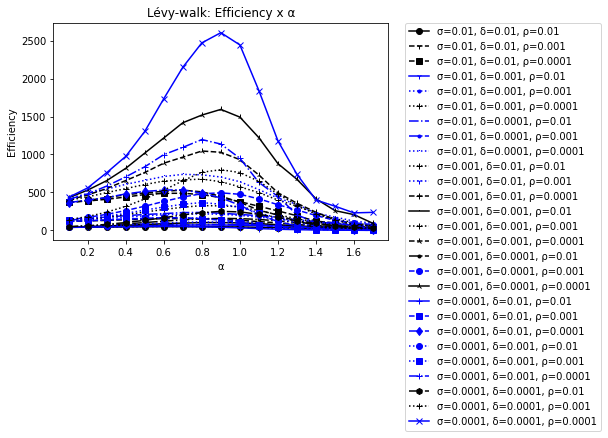

In [ ]:
seed = 0
for path in csv_files:
  seed += seed + 1
  random.seed(seed)
  mk_r = random.choice(marker)
  ls_r = random.choice(line_style)
  cl = random.choice(colors)

  style=cl+ls_r+mk_r
  
  data_results = Results(path)
  data_results.mult_plot_eff(style=style)

title = 'Lévy-walk: Efficiency x α'
plt.title(title)

#plt.xscale("log")
#plt.xlim([1.1, 3.0])
#plt.ylim([0.4, 0.6])

plt.ylabel("Efficiency")
plt.xlabel("α")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

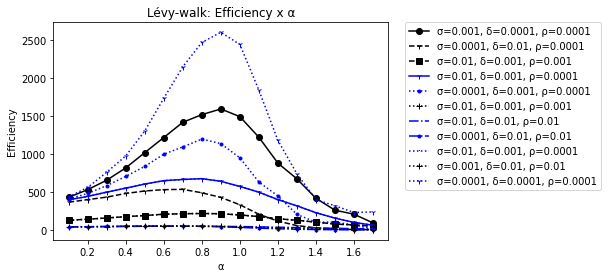

In [ ]:
seed = 0
for path in random_csv_files:
  seed += seed + 1
  random.seed(seed)
  mk_r = random.choice(marker)
  ls_r = random.choice(line_style)
  cl = random.choice(colors)

  style=cl+ls_r+mk_r
  
  data_results = Results(path)
  data_results.mult_plot_eff(style=style)

title = 'Lévy-walk: Efficiency x α'
plt.title(title)

#plt.xscale("log")
#plt.xlim([1.1, 3.0])
#plt.ylim([0.4, 0.6])

plt.ylabel("Efficiency")
plt.xlabel("α")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##Gráficos Artigo PRL - 09/12/2021

In [ ]:
os.chdir("/content/drive/MyDrive/Doutorado/contas_doutorado/PRL_Results/")
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
csv_files.sort()

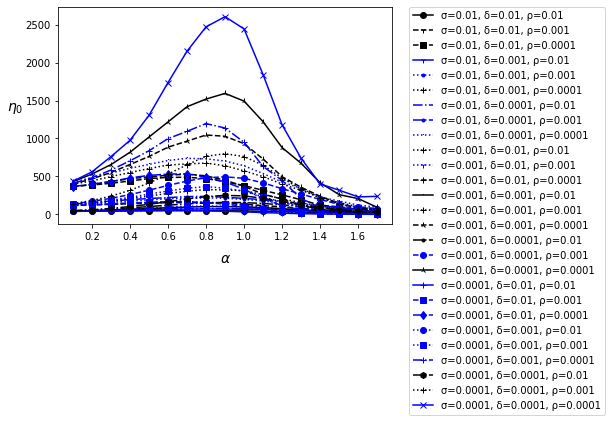

In [ ]:
seed = 0
for path in csv_files:
  seed += seed + 1
  random.seed(seed)
  mk_r = random.choice(marker)
  ls_r = random.choice(line_style)
  cl = random.choice(colors)

  style=cl+ls_r+mk_r
  
  data_results = Results(path)
  data_results.mult_plot_eff(style=style)

# title = 'Lévy-walk: Efficiency x α'
# plt.title(title)

#plt.xscale("log")
#plt.xlim([1.1, 3.0])
#plt.ylim([0.4, 0.6])

plt.ylabel(r"$\eta_{0}$", rotation=0, fontsize=14, labelpad=10)
plt.xlabel(r"$\alpha$", rotation=0, fontsize=14, labelpad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### Sigma fixo

In [ ]:
os.chdir("/content/drive/MyDrive/Doutorado/contas_doutorado/PRL_Results/sigma/")
path = os.getcwd()
csv_files_sigma = glob.glob(os.path.join(path, "*.csv"))
csv_files_sigma.sort()

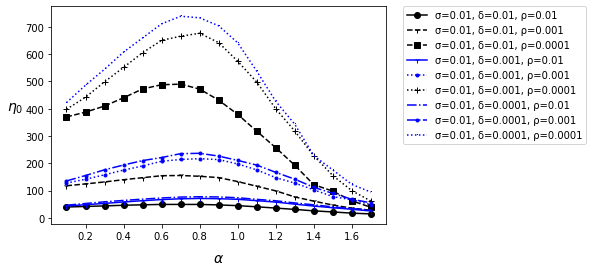

In [ ]:
seed = 0
for path in csv_files_sigma:
  seed += seed + 1
  random.seed(seed)
  mk_r = random.choice(marker)
  ls_r = random.choice(line_style)
  cl = random.choice(colors)

  style=cl+ls_r+mk_r
  
  data_results = Results(path)
  data_results.mult_plot_eff(style=style)

# title = 'Lévy-walk: Efficiency x α'
# plt.title(title)

#plt.xscale("log")
#plt.xlim([1.1, 3.0])
#plt.ylim([0.4, 0.6])

plt.ylabel(r"$\eta_{0}$", rotation=0, fontsize=14, labelpad=10)
plt.xlabel(r"$\alpha$", rotation=0, fontsize=14, labelpad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

###Delta fixo

In [ ]:
os.chdir("/content/drive/MyDrive/Doutorado/contas_doutorado/PRL_Results/delta/")
path = os.getcwd()
csv_files_delta = glob.glob(os.path.join(path, "*.csv"))
csv_files_delta.sort()

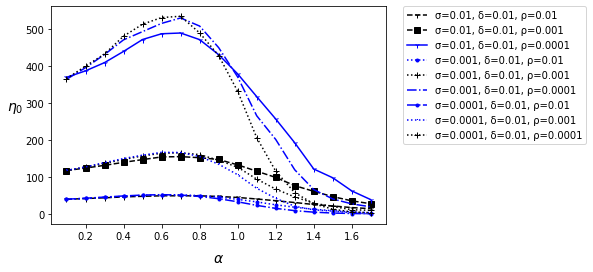

In [ ]:
seed = 1
for path in csv_files_delta:
  seed += seed + 1
  random.seed(seed)
  mk_r = random.choice(marker)
  ls_r = random.choice(line_style)
  cl = random.choice(colors)

  style=cl+ls_r+mk_r
  
  data_results = Results(path)
  data_results.mult_plot_eff(style=style)

# title = 'Lévy-walk: Efficiency x α'
# plt.title(title)

#plt.xscale("log")
#plt.xlim([1.1, 3.0])
#plt.ylim([0.4, 0.6])

plt.ylabel(r"$\eta_{0}$", rotation=0, fontsize=14, labelpad=10)
plt.xlabel(r"$\alpha$", rotation=0, fontsize=14, labelpad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

###Rho fixo

In [ ]:
os.chdir("/content/drive/MyDrive/Doutorado/contas_doutorado/PRL_Results/rho/")
path = os.getcwd()
csv_files_rho = glob.glob(os.path.join(path, "*.csv"))
csv_files_rho.sort()

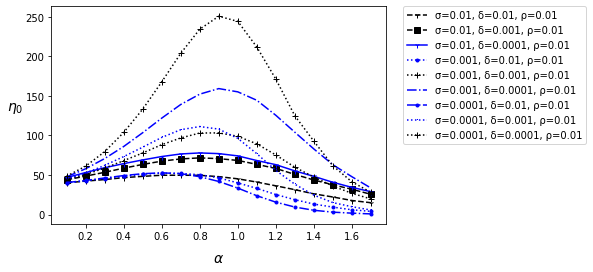

In [ ]:

seed = 1
for path in csv_files_rho:
  seed += seed + 1
  random.seed(seed)
  mk_r = random.choice(marker)
  ls_r = random.choice(line_style)
  cl = random.choice(colors)

  style=cl+ls_r+mk_r
  
  data_results = Results(path)
  data_results.mult_plot_eff(style=style)

# title = 'Lévy-walk: Efficiency x α'
# plt.title(title)

#plt.xscale("log")
#plt.xlim([1.1, 3.0])
#plt.ylim([0.4, 0.6])

plt.ylabel(r"$\eta_{0}$", rotation=0, fontsize=14, labelpad=10)
plt.xlabel(r"$\alpha$", rotation=0, fontsize=14, labelpad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

###Plots

In [ ]:
os.chdir("/content/drive/MyDrive/Doutorado/contas_doutorado/PRL_Results/Plots/")
path = os.getcwd()
csv_files_plots = glob.glob(os.path.join(path, "*.csv"))
csv_files_plots.sort()

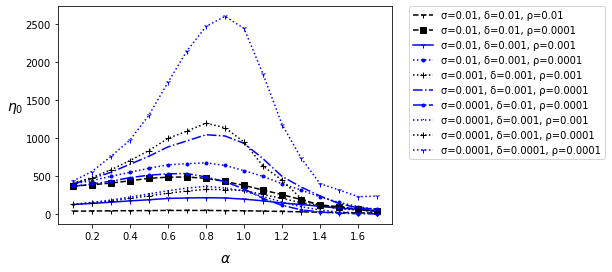

In [ ]:

seed = 1
for path in csv_files_plots:
  seed += seed + 1
  random.seed(seed)
  mk_r = random.choice(marker)
  ls_r = random.choice(line_style)
  cl = random.choice(colors)

  style=cl+ls_r+mk_r
  
  data_results = Results(path)
  data_results.mult_plot_eff(style=style)

#title = r'Lévy-walk: $\eta_{0}$ x α'
#plt.title(title)

#plt.xscale("log")
#plt.xlim([1.1, 3.0])
#plt.ylim([0.4, 0.6])

plt.ylabel(r"$\eta_{0}$", rotation=0, fontsize=14, labelpad=10)
plt.xlabel(r"$\alpha$", rotation=0, fontsize=14, labelpad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()